# Horror Films in Market Share & Audience Approval  
## by Fangzhou Lin

## Motivation
"I see dead people."
— The Sixth Sense

"Do you want to play a game?"
— Saw

Everybody needs some screaming for jump-and-scare enjoyment.
<br><br>
Horror films have been delievering great enjoyment for me. Though a huge fan of horror films myself, it's hard to deny that horror films are an inferior genre compared with others in box office, quality of the movie, social impact, storytelling, the star-studded lineup, award nomination and more. Horror films also give people the impression of poor audience reviews and ratings.
<br><br>
However, I am happy to see an increase of the number of horror films in the past few years. So with the movie data in hand, there's no better timing to explore the data and unfold stories about horror films.

## Investigation Overview

In the investigation, I wanted to find out whether horror film is a favorable genre in the movie industry & among audience. I mainly focus on id (moive), horror (categorize movies into horror & non-horror films), release_year, decades, vote_average (audience rating), and popularity. 

## Dataset Overview

There are 10,772 movies in the dataset after data cleaning. The attributes include id, popularity, vote_average, release_year, decades, horror, and other measurements such as original_title, director, budget_adj. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean  = pd.read_csv('tmdb-movies_clean.csv')

## Distribution of Movie Popularity

Popularity is a measure of the buzz a certain movie rendered. As briefly introduced in [TMDB API page](https://developers.themoviedb.org/3/getting-started/popularity), each movie's popularity value is calculated based on attributes like number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day. <br><br>
Popularity has a right-skewed long-tailed distribution, suggesting movies of high popularity on the right end. However, the majority of films are less than 2 in popularity, and a large amount of them falls in the low popularity end, with popularity of less than 1 point to be exact. <br><br>

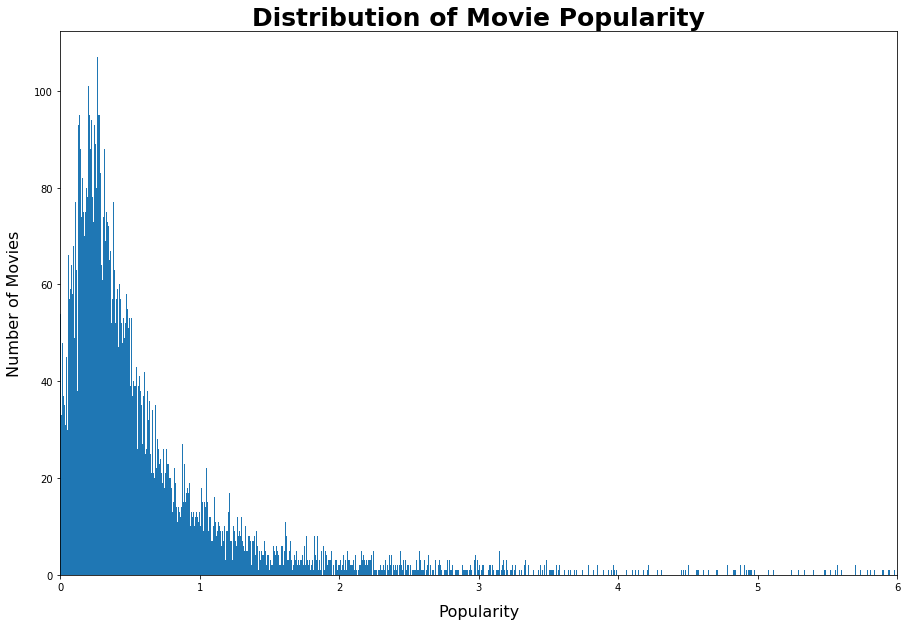

In [4]:
binsize = 0.005
bins = np.arange(0, df_clean.popularity.max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df_clean, x = 'popularity', bins = bins)
plt.xlabel('Popularity', fontsize = 16, labelpad = 12)
plt.ylabel('Number of Movies', fontsize = 16, labelpad = 12)
plt.xlim([0, 6])
plt.title('Distribution of Movie Popularity', fontweight = 'bold', fontsize = 25)
plt.show()

## Distribution of Average Vote

Average vote is an important metric on how audiences feel about a particular movie on average.
<br><br>The distribution is unimodal, although it is slightly left skewed. Big part of the data falls between 5 to 7 in a scale of 1 to 10.

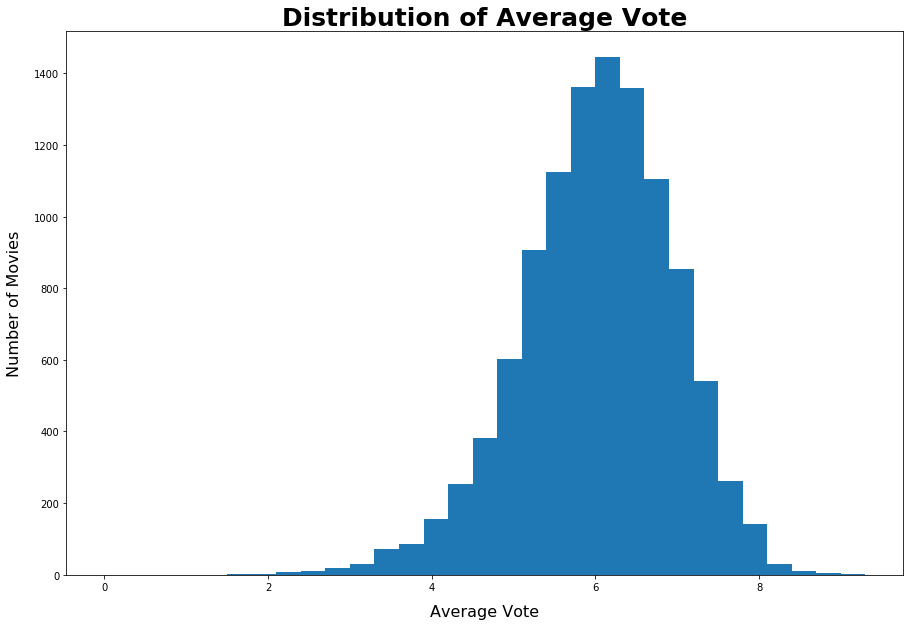

In [5]:
binsize = 0.3
bins = np.arange(0, df_clean.vote_average.max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df_clean, x = 'vote_average', bins = bins)
plt.xlabel('Average Vote', fontsize = 16, labelpad = 12)
plt.ylabel('Number of Movies', fontsize = 16, labelpad = 12)
plt.title('Distribution of Average Vote', fontweight = 'bold', fontsize = 25)
plt.show()

## The Number of Movies by Year
It shows an overall trend of increase from 1960 to 2015. Also, the number of movies released started to rocket up in 1995, and has been staying strong consistently since then. Over the course of 55 years, it took the movie industry 36 years to reach 200 movies released record; 10 years to reach 400 movies milestone; 7 years to reach 600.


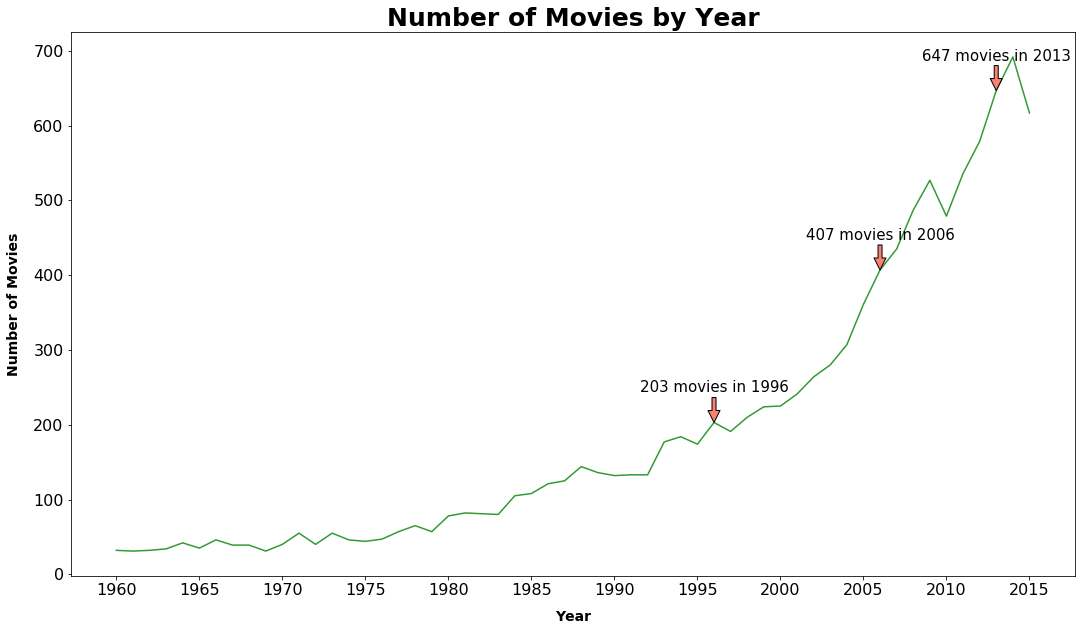

In [6]:
# group by release_year and get the count of movies for each year
yrs_movies = df_clean.groupby('release_year').count()['id']
movies_by_years = yrs_movies.values
# get all the release_year values
years = yrs_movies.index

# get the years that first reach the threshold of 200, 400, 600 movies respectively
# and get the number of movies corresponding to these years
milestones = [200, 400, 600]
yrs_milestones = []
mvs_milestones = []
for x in milestones:
    yrs_milestones.append(yrs_movies[movies_by_years>x].index[0])
    mvs_milestones.append(yrs_movies[movies_by_years>x].values[0])

# replot with annotations
# plot the line chart
plt.figure(figsize=(18,10))
plt.plot(years, movies_by_years, color = 'g', alpha = 0.8)

# add labels of points of interest
for x,y in zip(yrs_milestones, mvs_milestones):
    label = "{} movies in {}".format(y, x)
#     plt.text(x, y, '{} movies in {}'.format(y, x), fontsize = 13, horizontalalignment = 'center')
    plt.annotate(label, (x,y), textcoords="offset points", 
                 xytext=(0,30), ha='center',
                 fontsize = 15,
                 arrowprops = dict(facecolor='salmon'))
# customize ticks, labels, and title    
plt.xticks(np.arange(1960, 2015+5, 5), np.arange(1960, 2015+5, 5), fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Year', fontweight = 'bold', fontsize = 14, labelpad = 12)
plt.ylabel('Number of Movies', fontweight = 'bold', fontsize = 14, labelpad = 12)
plt.title('Number of Movies by Year', fontweight = 'bold', fontsize = 25)
plt.show()

## The Number of Horror Movies by Year
Consistent with the general trend in the number of films by year,, the number of horror movies released has an overall trend of increase from 1960 to 2015, although the trend is less smooth with rugged fluctuation. Since the year 2004, the number of horror movies started to substantially increase.<br><br>
It makes sense that when the total number of films increase, a great chance lies in a consistent increase in a certain genre of films. <br><br>
It is worth looking at horror films percentage of all films by year to understand more about how the number of horror films grows since 2004.

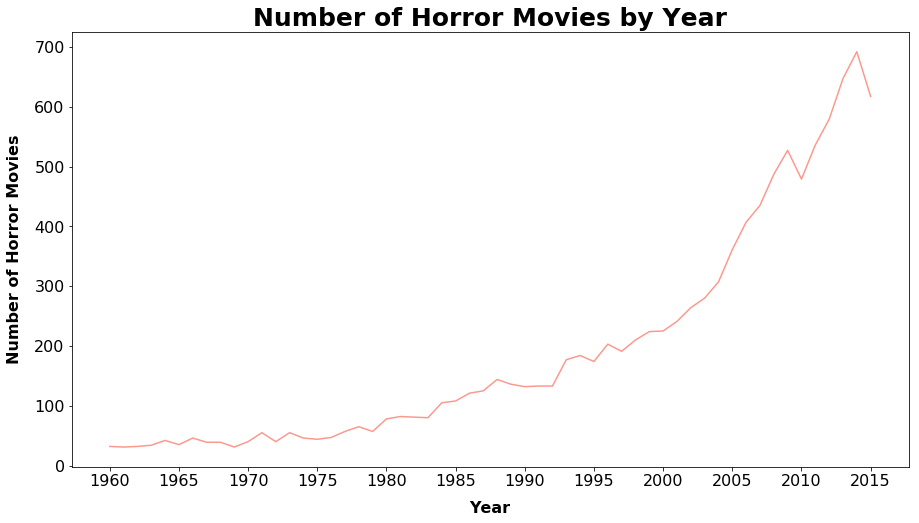

In [9]:
# filter only horror films
df_horror = df_clean.query('horror == True')
# group by release_year and get the count of movies for each year
yrs_horror = df_horror.groupby('release_year').count()['id']
horror_by_years = yrs_horror.values
# get all the release_year values
years = yrs_horror.index

# plot a line chart
plt.figure(figsize=(15,8))
plt.plot(years, movies_by_years, color = 'salmon', alpha = 0.8)

# customize ticks, labels, and title    
plt.xticks(np.arange(1960, 2015+5, 5), np.arange(1960, 2015+5, 5), fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Year', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.ylabel('Number of Horror Movies', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.title('Number of Horror Movies by Year', fontweight = 'bold', fontsize = 25)
plt.show()

## Horror Films in % of All Films by Year (since 2004)
Horror genre has an overall upward trend in its percentage among all films. It started from less than 10% back in 2004 to almost 20% in 2015. This is impressive considering how fast the whole movie industry was growing during that same period. Horror films had been achieving a bigger share of the pie in movie industry and movie-makers were motivated to make more horror films for the market.

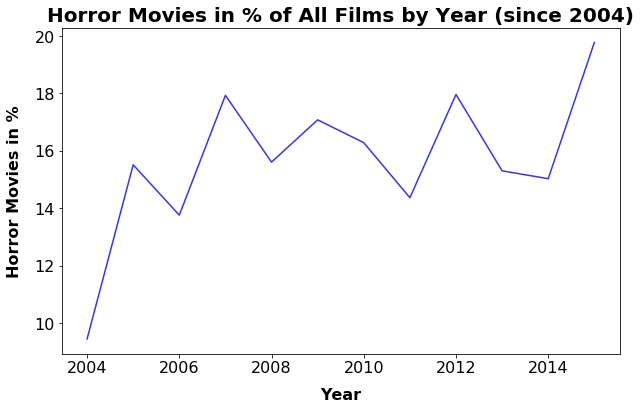

In [11]:
# create a dataframe includes only release_year in and after 2004
df_horror_2 = df_horror.query('release_year >= 2004')
# get the total of horror films per year since 2004
counts_horror = df_horror_2.groupby('release_year').count()['id']
# get the total of films per year since 1990
totals = df_clean.query('release_year >= 1990').groupby('release_year').count()['id']
# compute the proportion of horror films in films released per year
horror_proportion = counts_horror/totals
# get the release_year data for x-axis
release_years = horror_proportion.index
# get the proportion values for y-axis
proportions = horror_proportion.values
# plot a line chart
plt.figure(figsize=(10,6))
plt.plot(release_years, proportions*100, color = 'b', alpha = 0.8)

# customize ticks, labels, and title  
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Year', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.ylabel('Horror Movies in %', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.title('Horror Movies in % of All Films by Year (since 2004)', fontweight = 'bold', fontsize = 20)
plt.show()

## Non-horror vs. Horror Films in Average Vote by Decade
I use the median of average votes in every decade as the metric for comparing the audience approval in horror vs. non-horror films. <br><br>
In every decade, the average vote of non-horror films is always higher than that of horror films. <br><br>The average vote of non-horror films appears to be quite consistent over the decades. In contrast, horror films kept decreasing in average vote decade by decade, even when horror films won a bigger share in movie market during 2000s and 2010s.

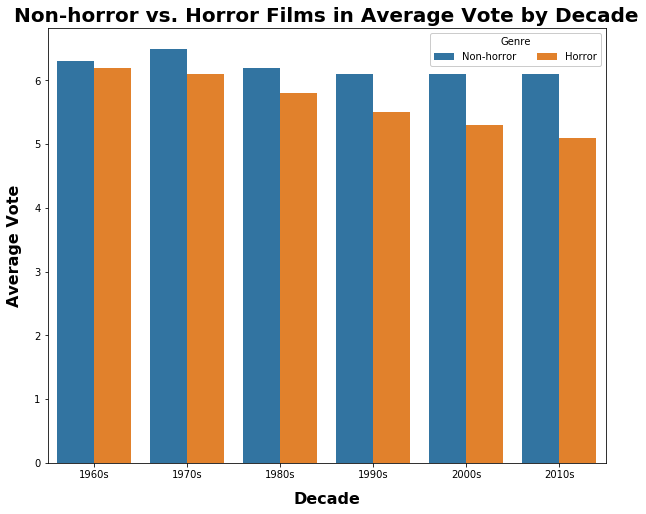

In [12]:
# the median of vote_average for horror and non-horror in each decade 
df_v = df_clean.groupby(('decades', 'horror'), as_index = False)['vote_average'].median()

labels = ['Non-horror', 'Horror']
# plot the bar chart
plt.figure(figsize=(10,8))
ax = sns.barplot(data = df_v, x = 'decades', y = 'vote_average', hue = 'horror')
# set the labels
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, loc = 1, ncol = 2, framealpha = 1, title = 'Genre')
plt.xlabel('Decade', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.ylabel('Average Vote', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.title('Non-horror vs. Horror Films in Average Vote by Decade', fontweight = 'bold', fontsize = 20)
plt.show()

## Non-horror vs. Horror Films in Popularity by Decade
In every decade, horror films appear to rendered smaller popularity than non-horror. Interestingly, non-horror and horror films seem to follow a similar trend of fluctuation over the decades. Popularity of horror films reached peak in 1990s. 

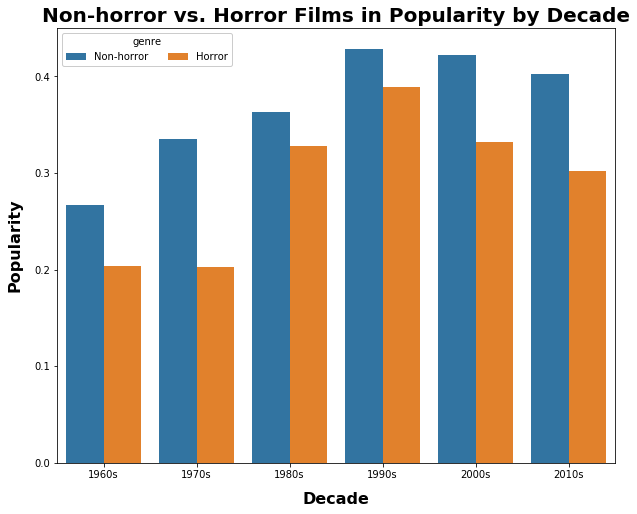

In [13]:
# the median of popularity for horror and non-horror in each decade 
df_p = df_clean.groupby(('decades', 'horror'), as_index = False)['popularity'].median()

# plot the bar chart
plt.figure(figsize=(10,8))
ax = sns.barplot(data = df_p, x = 'decades', y = 'popularity', hue = 'horror')
# set the labels
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, loc = 2, ncol = 2, framealpha = 1, title = 'genre')
plt.xlabel('Decade', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.ylabel('Popularity', fontweight = 'bold', fontsize = 16, labelpad = 12)
plt.title('Non-horror vs. Horror Films in Popularity by Decade', fontweight = 'bold', fontsize = 20)
plt.show()